## Regresion Logistica

1. La regresión logística es un modelo estadístico utilizado para realizar predicciones binarias, es decir, cuando queremos clasificar un resultado en dos categorías. Un ejemplo típico es determinar si un paciente, según ciertos síntomas, tiene o no una enfermedad.

2. Este modelo utiliza la función logística (sigmoide), cuya salida siempre está en el rango de 0 a 1. Esto nos permite interpretar el resultado como una probabilidad.

3. Una vez aplicada la función logistica, los valores obtenidos se interpretan de la siguiente manera:
  - Si el resultado es mayor o igual a 0.5, se clasifica como verdadero (1).
  - Si el resultado es menor a 0.5, se clasifica como falso (0).

#### Funcion logistica (Sigmoide) $ f(z) = \frac{1}{1 + e^{-z}} $
Donde $ z $ es la funcion de regresion lineal, por lo cual quedaria de la siguiente manera

$ f(z) = \frac{1}{1+e^{-{b_1*x_1+...+b_k*x_k+a}}} $

In [14]:
#Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [15]:
#Generamos los datos de prueba

np.random.seed(42)

X1 = np.random.normal(0, 1, 1000)
X2 = np.random.normal(2, 1.5, 1000)

Y = (1/(1+np.exp(-(0.5 * X1 + 0.8 * X2)))) > 0.5
Y = Y.astype(int)

df = pd.DataFrame({'X1': X1, 'X2': X2,'Y': Y})

df.head()

,X1,X2,Y
0,0.496714,4.099033,1
1,-0.138264,3.386951,1
2,0.647689,2.089446,1
3,1.523030,1.029595,1
4,-0.234153,3.047335,1


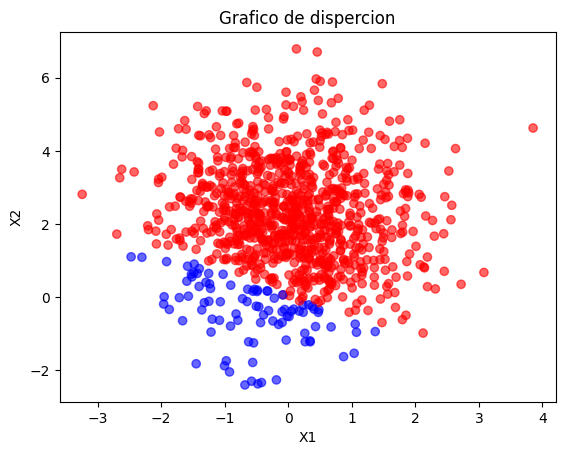

In [16]:
#Crear el grafico de dispercion
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap='bwr', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Grafico de dispercion')
plt.show()

In [17]:
#Dividir los datos de prueba de los de entrenamiento

X = df[['X1', 'X2']]
Y = df['Y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
#Entrenar el modelo con los datos de prueba

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

In [19]:
#Realizar las predicciones
y_pred = modelo.predict(x_test)

In [24]:
#Evaluar el modelo

#Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusion \n", matriz_confusion)

#precision del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precision del modelo: \n {precision:.2f}")

#Informe de clasificacion
informe_clasificacion = classification_report(y_test, y_pred)
print(f"Informe de clasificacion: \n {informe_clasificacion}")


Matriz de confusion 
 [[ 18   1]
 [  0 181]]
Precision del modelo: 
 0.99
Informe de clasificacion: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.99      1.00      1.00       181

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.99       200
weighted avg       1.00      0.99      0.99       200

